# 1. Introduction
In this part, I will be using the data that's been processed in the part 4 as inputs for several machine learning models as an attempt to predict Metacritic scores. <br>
Features to use (all are categorical):
- Platforms
- Genres
- Tags

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pycaret

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

## 1.1 Load Dataset

In [2]:
df = pd.read_csv('../Data/final_df.csv')
train_set = pd.read_csv('../Data/train_set.csv')
test_set = pd.read_csv('../Data/test_set.csv')

In [3]:
# train set
data = train_set.drop("metacritic", axis=1) # drop labels for training set
data_labels = train_set["metacritic"].copy() # y variable

# test set
x_test = test_set.drop("metacritic", axis=1) # drop labels for training set
y_test = test_set["metacritic"].copy() # y variable

# 2. Linear Regression

In [5]:
# Train with LinearRegression (OLS linear regression)
from sklearn.linear_model import LinearRegression

# Set up
lin_reg = LinearRegression()
lin_reg.fit(data, data_labels)

# make predictions
data_predictions = lin_reg.predict(data)

# Metric
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE for train set: " + str(lin_rmse))

RMSE for train set: 8.715563051776401


In [6]:
# Set up
lin_reg = LinearRegression()
lin_reg.fit(data, data_labels)

# make predictions
data_predictions = lin_reg.predict(x_test)

# Metric
lin_mse = mean_squared_error(y_test, data_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE for test set: " + str(lin_rmse))

RMSE for test set: 169784033252.96356


# 3. Random Forest Regressor

In [20]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

# n_estimators: number of trees in forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data, data_labels)

# make predictions
data_predictions = forest_reg.predict(data)

# Metric
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE for train set: " + str(forest_rmse))

RMSE for train set: 3.9997388158077345


In [21]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

# n_estimators: number of trees in forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data, data_labels)

# make predictions
data_predictions = forest_reg.predict(x_test)

# Metric
forest_mse = mean_squared_error(y_test, data_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE for test set: " + str(forest_rmse))

RMSE for test set: 9.487118217587387


# 4. Support Vector Machine

In [22]:
# SupportVectorMachine (Epsilon-Support Vector Regression)
from sklearn.svm import SVR

# kernel: linear, poly, rbf (default), sigmoid, precomputed
svm_reg = SVR(kernel="linear")
svm_reg.fit(data, data_labels)

# make predictions
data_predictions = svm_reg.predict(data)

# Metric
svm_mse = mean_squared_error(data_labels, data_predictions)
svm_rmse = np.sqrt(svm_mse)
print("RMSE for train set: " + str(svm_rmse))

RMSE for train set: 9.115719699561602


In [42]:
# SupportVectorMachine (Epsilon-Support Vector Regression)
from sklearn.svm import SVR

# kernel: linear, poly, rbf (default), sigmoid, precomputed
svm_reg = SVR(kernel="linear")
svm_reg.fit(data, data_labels)

# make predictions
data_predictions = svm_reg.predict(x_test)

# Metric
svm_mse = mean_squared_error(y_test, data_predictions)
svm_rmse = np.sqrt(svm_mse)
print("RMSE for test set: " + str(svm_rmse))

RMSE for test set: 9.857068901488233


# 5. Decision Tree Regression

In [24]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor

# Input only #random_state=0 or 42
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data,data_labels)

# make predictions
data_predictions = regressor.predict(data)

# Metric
dec_mse = mean_squared_error(data_labels, data_predictions)
dec_rmse = np.sqrt(dec_mse)
print("RMSE for train set: " + str(dec_rmse))

RMSE for train set: 2.0433561790339967


In [25]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor

# Input only #random_state=0 or 42
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data,data_labels)

# make predictions
data_predictions = regressor.predict(x_test)

# Metric
dec_mse = mean_squared_error(y_test, data_predictions)
dec_rmse = np.sqrt(dec_mse)
print("RMSE for test set: " + str(dec_rmse))

RMSE for test set: 13.64271924908898


# 6. K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# k = 3
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(data,data_labels)

# make predictions
data_predictions = neigh.predict(data)

# Metric
neigh_mse = mean_squared_error(data_labels, data_predictions)
neigh_rmse = np.sqrt(neigh_mse)
print("RMSE for train set: " + str(neigh_rmse))

RMSE for train set: 7.565342937065882


In [27]:
from sklearn.neighbors import KNeighborsRegressor

# k = 3
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(data,data_labels)

# make predictions
data_predictions = neigh.predict(x_test)

# Metric
neigh_mse = mean_squared_error(y_test, data_predictions)
neigh_rmse = np.sqrt(neigh_mse)
print("RMSE for train set: " + str(neigh_rmse))

RMSE for train set: 10.592563672173583


# 7. AdaBoost

In [29]:
# stats
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(data,data_labels)

# make predictions
data_predictions = ada.predict(data)

# Metric
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ada, data, data_labels, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# MAE
print("MAE for train set: " + str(mean(n_scores)) + " (Std Dev: " + str(std(n_scores)) + ")")

# RMSE
ada_mse = mean_squared_error(data_labels, data_predictions)
ada_rmse = np.sqrt(ada_mse)
print("RMSE for train set: " + str(ada_rmse))

MAE for train set: -8.69077722259858 (Std Dev: 0.483370282101624)
RMSE for train set: 10.676407809829989


In [30]:
# stats
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(data,data_labels)

# make predictions
data_predictions = ada.predict(x_test)

# Metric
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ada, x_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# MAE
print("MAE for test set: " + str(mean(n_scores)) + " (Std Dev: " + str(std(n_scores)) + ")")

# RMSE
ada_mse = mean_squared_error(y_test, data_predictions)
ada_rmse = np.sqrt(ada_mse)
print("RMSE for test set: " + str(ada_rmse))

MAE for test set: -8.338588640126241 (Std Dev: 0.8697921649412083)
RMSE for test set: 10.62350517308404


# 8. Gradient Boost Regressor

In [33]:
from sklearn import ensemble

params = {'n_estimators': 3, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'mse'}

gradient_boosting_regressor_model = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor_model.fit(data, data_labels)

# make predictions
data_predictions = gradient_boosting_regressor_model.predict(data)

# Metric
gbr_mse = mean_squared_error(data_labels, data_predictions)
gbr_rmse = np.sqrt(gbr_mse)
print("RMSE for train set: " + str(gbr_rmse))

RMSE for train set: 9.565786296914943


In [34]:
from sklearn import ensemble

params = {'n_estimators': 3, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'mse'}

gradient_boosting_regressor_model = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor_model.fit(data, data_labels)

# make predictions
data_predictions = gradient_boosting_regressor_model.predict(x_test)

# Metric
gbr_mse = mean_squared_error(y_test, data_predictions)
gbr_rmse = np.sqrt(gbr_mse)
print("RMSE for test set: " + str(gbr_rmse))

RMSE for test set: 10.086508353719507


# 9. Extra Tree Regressor

In [35]:
from sklearn.ensemble import ExtraTreesRegressor

extratree = ExtraTreesRegressor()
extratree.fit(data,data_labels)

# make predictions
data_predictions = extratree.predict(data)

# Metric
extratree_mse = mean_squared_error(data_labels, data_predictions)
extratree_rmse = np.sqrt(extratree_mse)
print("RMSE for train set: " + str(extratree_rmse))

RMSE for train set: 2.0433561790339967


In [36]:
from sklearn.ensemble import ExtraTreesRegressor

extratree = ExtraTreesRegressor()
extratree.fit(data,data_labels)

# make predictions
data_predictions = extratree.predict(x_test)

# Metric
extratree_mse = mean_squared_error(y_test, data_predictions)
extratree_rmse = np.sqrt(extratree_mse)
print("RMSE for test set: " + str(extratree_rmse))

RMSE for test set: 13.182428792510434


# 10. XGBoost Regressor

In [38]:
import xgboost as xgb

# Instantiate XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(data,data_labels)

# make a prediction
data_predictions = xg_reg.predict(data)

# Metric
xg_reg_mse = mean_squared_error(data_labels, data_predictions)
xg_reg_rmse = np.sqrt(xg_reg_mse)
print("RMSE for train set: " + str(xg_reg_rmse))

RMSE for train set: 27.894680884660474


In [39]:
import xgboost as xgb

# Instantiate XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(data,data_labels)

# make a prediction
data_predictions = xg_reg.predict(x_test)

# Metric
xg_reg_mse = mean_squared_error(y_test, data_predictions)
xg_reg_rmse = np.sqrt(xg_reg_mse)
print("RMSE for test set: " + str(xg_reg_rmse))

RMSE for test set: 28.081992487362925


# 11. Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(data, data_labels)

# make a prediction
data_predictions = ridge.predict(data)

# Metric
ridge_mse = mean_squared_error(data_labels, data_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print("RMSE for train set: " + str(ridge_rmse))

RMSE for train set: 8.751709286406275


In [41]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(data, data_labels)

# make a prediction
data_predictions = ridge.predict(x_test)

# Metric
ridge_mse = mean_squared_error(y_test, data_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print("RMSE for test set: " + str(ridge_rmse))

RMSE for test set: 9.877904001325112


Summary of results for test set:

| Model                        | Test RMSE           |
| ---------------------------- |:-------------------:|
| Linear Regression            | 169784033252.96356  |
| Random Forest Regressor      | 9.487118217587387   |
| Support Vector Machine       | 9.857068901488233   |
| Decision Tree Regression     | 13.64271924908898   |
| K-Nearest Neighbors          | 10.592563672173583  |
| AdaBoost                     | 10.62350517308404   |
| Gradient Boost Regressor     | 10.086508353719507  |
| Extra Tree Regressor         | 13.182428792510434  |
| XGBoost Regressor            | 28.081992487362925  |
| Ridge Regression             | 9.877904001325112   |

Linear Regression seems to produce an abnormal result. XGBoost Regressor appears to be the worse performing one among the 10 models. Random Forest shows the best result, followed closely by Support Vector Machine.

Let's try using GridSearch to optimise both Random Forest and Support Vector Machine.

# 12. Optimisation - Model Tuning
## 12.1 GridSearch on Random Forest Regressor
### 12.1.1 Random Search
By using a random search on hyperparameters, not every combination will be used. This helps to narrow down the parameters that are important while saving computational cost.

In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# Dictionary/list of all parameter options
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# check grid
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Start the random search and fit the model:

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Create base model
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit random search model
rf_random.fit(data, data_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 47.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Display best parameters from fitting the random search:

In [46]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [6]:
def evaluate(model, test_features, test_labels):
    data_predictions = model.predict(test_features)
    abs_errors = abs(data_predictions - test_labels)
    # mean absolute percentage error
    mape = 100 * np.mean(abs_errors / test_labels)
    accuracy = 100 - mape
    
    print('Average Error: {:0.4f} degrees'.format(np.mean(abs_errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))
    
    # RMSE
    mse = mean_squared_error(test_labels, data_predictions)
    rmse = np.sqrt(mse)
    print("RMSE for test set: " + str(rmse))
    
    return accuracy

# base model
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(data, data_labels)
base_accuracy = evaluate(base_model, x_test, y_test)

Average Error: 7.8207 degrees
Accuracy = 88.69%
RMSE for test set: 10.03585615504799


In [11]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Average Error: 7.2521 degrees
Accuracy = 89.30%
RMSE for test set: 9.469523735649329


In [12]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.69%.


From the random search, the parameters to focus on are:
- n_estimators
- min_samples_split
- min_samples_leaf
- max_features
- max_depth
- bootstrap

### 12.1.2 Grid Search
Now to start a cross-validated grid search on these parameters:

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Dictionary/list of all parameter options
param_grid = {
    'max_features': ['sqrt', 'auto', 'log2'],
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [2, 4, 5],
    'min_samples_split': [2, 8, 10],
    'n_estimators': [100, 400, 600, 1000]
}

# Create base model
rf = RandomForestRegressor()

# Grid search of all parameters
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [51]:
# Fit search model
grid_search.fit(data, data_labels)

# # The best hyperparameter combination found
grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 81.3min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [15]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Average Error: 7.3113 degrees
Accuracy = 89.29%
RMSE for test set: 9.547566374653456


In [16]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.67%.


In [33]:
best_grid = RandomForestRegressor(bootstrap= True,
 max_depth= 100,
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators= 100)

best_grid.fit(data, data_labels)

RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=10)

### 12.1.3 Create Predicted Output CSV
**Note: There is a need to re-create the `test_set` since the imported one no longer has a `name` column.**

In [34]:
# re-create test_set to retrieve back the name list
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
test_set.drop([
'rank',
'id',
'released',
'rating',
'rating_top',
'ratings_count',
'reviews_text_count',
'added',
'playtime',
'suggestions_count',
'reviews_count',
'parent_platforms',
'platforms',
'ratings',
'genres',
'tags',
'Year'], axis = 1, inplace=True) 
test_set.dropna(inplace=True)


# make predictions
final_predictions = best_grid.predict(x_test)

# Create new df
final_data = pd.DataFrame({'Game Title':test_set['name'], 'Predicted Metacritic Score':final_predictions}).set_index('Game Title')

# combine with main df based on common game name
merged = pd.merge(final_data, df, left_on='Game Title', right_on='name', how='left')

# add in error calculation columns
merged['relative_error'] = merged['metacritic'] - merged['Predicted Metacritic Score']
merged['absolute_error'] = abs(merged['metacritic'] - merged['Predicted Metacritic Score'])

# final result df
results = merged.copy()
results = results[['name', 'metacritic', 'Predicted Metacritic Score', 'absolute_error', 'relative_error']]
display(results)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-34-e0ac3c8f7993>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.dropna(inplace=True)


,name,metacritic,Predicted Metacritic Score,absolute_error,relative_error
0,Resident Evil Outbreak: File 2,58.0,77.586680,19.586680,-19.586680
1,MASSIVE CHALICE,73.0,69.791095,3.208905,3.208905
2,Fahrenheit (Indigo Prophecy),85.0,66.018824,18.981176,18.981176
3,Dragon Age: Origins - Ultimate Edition,88.0,75.056642,12.943358,12.943358
4,Stories: The Path of Destinies,74.0,74.610179,0.610179,-0.610179
...,...,...,...,...,...
651,Left 4 Dead 2,89.0,70.468265,18.531735,18.531735
652,Ice Age 3 Dawn of the Dinosaurs,59.0,68.181515,9.181515,-9.181515
653,SOMA,84.0,73.616037,10.383963,10.383963
654,Danger Zone,64.0,64.865266,0.865266,-0.865266


<Figure size 432x288 with 0 Axes>

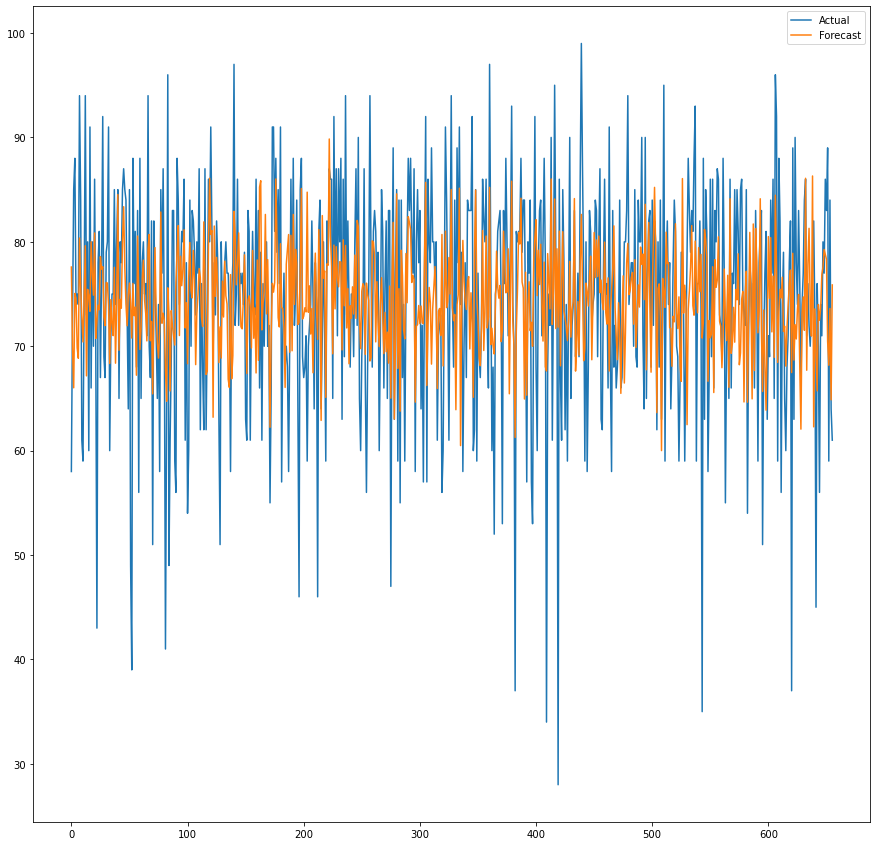

In [39]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.figure(figsize=(15,15))
plt.plot(results['metacritic'],label='Actual')
plt.plot(results['Predicted Metacritic Score'],label='Forecast')
plt.legend()

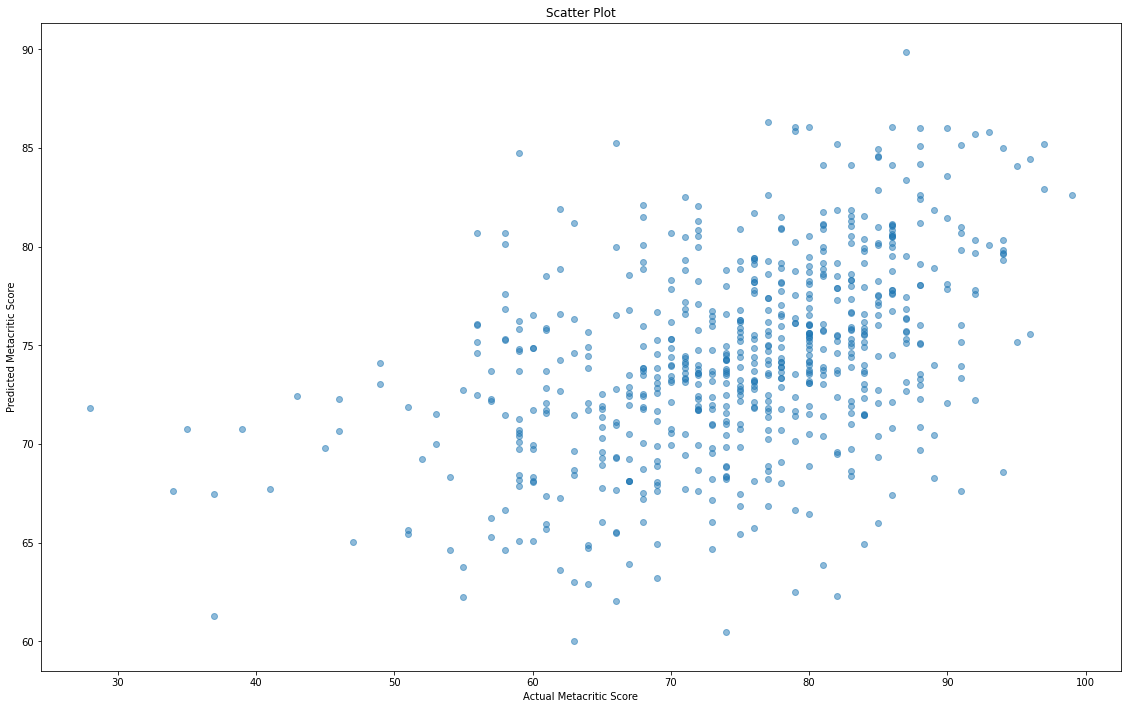

In [40]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,9))
ax=fig.add_axes([0,0,1,1])
ax.scatter(results['metacritic'], results['Predicted Metacritic Score'], alpha=0.5)
ax.set_xlabel('Actual Metacritic Score')
ax.set_ylabel('Predicted Metacritic Score')
ax.set_title('Scatter Plot')
plt.show()

In [37]:
results.to_csv('../Predicted Scores/results_rf_grid.csv', index=False)

In [38]:
results['absolute_error'].mean()

7.317760953625915

## 12.2 GridSearch on Support Vector Machine
### 12.2.1 Grid Search 

In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Dictionary/list of all parameter options
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

# Create base model
svm_reg = SVR()

# Grid search of all parameters
grid_search = GridSearchCV(svm_reg, param_grid, cv=3,
                           n_jobs = -1, verbose = 2)

# Fit search model
grid_search.fit(data, data_labels)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  3.5min finished


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [18]:
# Best hyperparameter combination
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [19]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Average Error: 7.1329 degrees
Accuracy = 89.33%
RMSE for test set: 9.516711070354274


In [20]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.71%.


### 12.2.2 Create Predicted Output CSV

**Note: There is a need to re-create the `test_set` since the imported one no longer has a `name` column.**

In [26]:
# re-create test_set to retrieve back the name list
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
test_set.drop([
'rank',
'id',
'released',
'rating',
'rating_top',
'ratings_count',
'reviews_text_count',
'added',
'playtime',
'suggestions_count',
'reviews_count',
'parent_platforms',
'platforms',
'ratings',
'genres',
'tags',
'Year'], axis = 1, inplace=True) 
test_set.dropna(inplace=True)


# make predictions
final_predictions = best_grid.predict(x_test)

# Create new df
final_data = pd.DataFrame({'Game Title':test_set['name'], 'Predicted Metacritic Score':final_predictions}).set_index('Game Title')

# combine with main df based on common game name
merged = pd.merge(final_data, df, left_on='Game Title', right_on='name', how='left')

# add in error calculation columns
merged['relative_error'] = merged['metacritic'] - merged['Predicted Metacritic Score']
merged['absolute_error'] = abs(merged['metacritic'] - merged['Predicted Metacritic Score'])

# final result df
results = merged.copy()
results = results[['name', 'metacritic', 'Predicted Metacritic Score', 'absolute_error', 'relative_error']]
display(results)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-26-575b06b42c84>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.dropna(inplace=True)


,name,metacritic,Predicted Metacritic Score,absolute_error,relative_error
0,Resident Evil Outbreak: File 2,58.0,79.855281,21.855281,-21.855281
1,MASSIVE CHALICE,73.0,69.102640,3.897360,3.897360
2,Fahrenheit (Indigo Prophecy),85.0,65.768940,19.231060,19.231060
3,Dragon Age: Origins - Ultimate Edition,88.0,77.405290,10.594710,10.594710
4,Stories: The Path of Destinies,74.0,76.835813,2.835813,-2.835813
...,...,...,...,...,...
651,Left 4 Dead 2,89.0,72.504629,16.495371,16.495371
652,Ice Age 3 Dawn of the Dinosaurs,59.0,72.675962,13.675962,-13.675962
653,SOMA,84.0,74.153505,9.846495,9.846495
654,Danger Zone,64.0,63.112087,0.887913,0.887913


<Figure size 432x288 with 0 Axes>

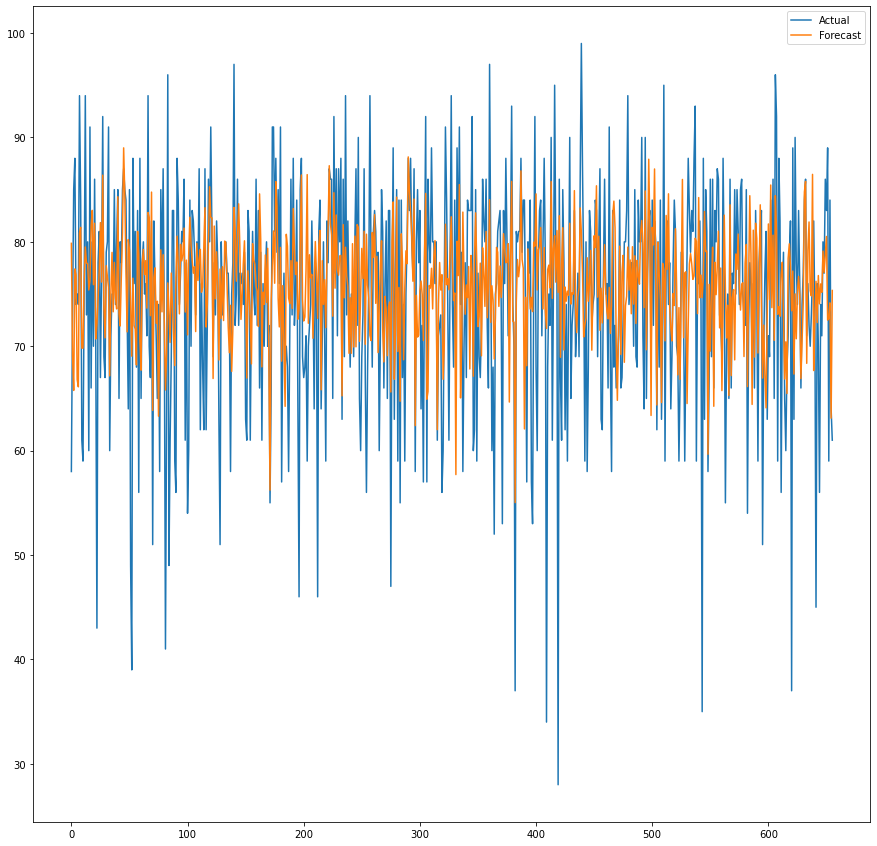

In [27]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.figure(figsize=(15,15))
plt.plot(results['metacritic'],label='Actual')
plt.plot(results['Predicted Metacritic Score'],label='Forecast')
plt.legend()

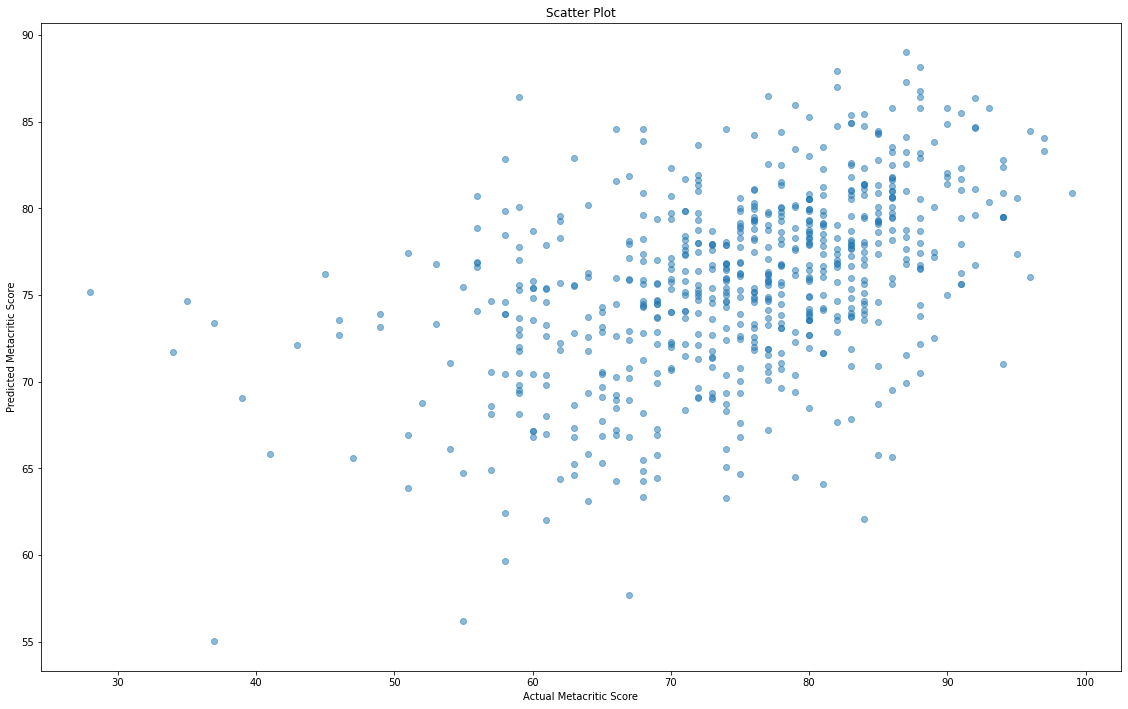

In [28]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,9))
ax=fig.add_axes([0,0,1,1])
ax.scatter(results['metacritic'], results['Predicted Metacritic Score'], alpha=0.5)
ax.set_xlabel('Actual Metacritic Score')
ax.set_ylabel('Predicted Metacritic Score')
ax.set_title('Scatter Plot')
plt.show()

In [30]:
results.to_csv('../Predicted Scores/results_svr_grid.csv', index=False)

In [29]:
results['absolute_error'].mean()

7.132888084897704

# 13. Using PyCaret
# 13.1 Set Up Datasets

In [41]:
import pycaret
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

np.random.seed(42)

Since the pycaret library has its own built-in functions to split the dataset into train-test sets, along with the ablility to ignore columns, it is necessary to create a new dataset to feed into the pycaret model.

This new dataset would contain all the feature columns, the label (`metacritic`), and their respective game `name`. Hence there is no need to merge back the predicted dataframe into the main dataframe again.

In [61]:
df = pd.read_csv('../Data/final_df.csv')

In [63]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [64]:
# train set
# keep only name, features and label
train_set.drop([
#'name',
'rank',
'id',
'released',
'rating',
'rating_top',
'ratings_count',
'reviews_text_count',
'added',
'playtime',
'suggestions_count',
'reviews_count',
'parent_platforms',
'platforms',
'ratings',
'genres',
'tags',
'Year'], axis = 1, inplace=True)

train_set.dropna(axis=0, inplace=True)

# test set
# keep only name, features and label
test_set.drop([
#'name',
'rank',
'id',
'released',
'rating',
'rating_top',
'ratings_count',
'reviews_text_count',
'added',
'playtime',
'suggestions_count',
'reviews_count',
'parent_platforms',
'platforms',
'ratings',
'genres',
'tags',
'Year'], axis = 1, inplace=True)

test_set.dropna(axis=0, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-64-0c39a39b1baf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.dropna(axis=0, inplace=True)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-64-0c39a39b1baf>:45: SettingWit

## 13.2 PyCaret Modelling

In [70]:
# pycaret library
from pycaret.regression import *

# PyCaret modelling
reg_mod = setup(train_set, target='metacritic', session_id=42, ignore_features = ['name'], silent=True)

,Description,Value
0,session_id,42
1,Target,metacritic
2,Original Data,"(2643, 445)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,443
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1850, 392)"


In [71]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,7.3555,91.8105,9.5630,0.1579,0.1398,0.1079,0.1240
gbr,Gradient Boosting Regressor,7.4714,94.0039,9.6790,0.1374,0.1417,0.1098,0.2640
omp,Orthogonal Matching Pursuit,7.5474,96.2405,9.7924,0.1162,0.1427,0.1103,0.0260
lightgbm,Light Gradient Boosting Machine,7.5744,96.1830,9.7931,0.1155,0.1422,0.1104,0.2710
rf,Random Forest Regressor,7.5794,98.6250,9.9170,0.0917,0.1442,0.1101,0.6960
ridge,Ridge Regression,7.7400,100.8742,10.0257,0.0739,0.1449,0.1126,0.0260
huber,Huber Regressor,7.7079,102.2466,10.0917,0.0610,0.1463,0.1133,0.7250
xgboost,Extreme Gradient Boosting,7.6884,102.2099,10.0942,0.0604,0.1465,0.1120,0.7750
en,Elastic Net,8.1200,108.9035,10.4269,-0.0004,0.1513,0.1191,0.0220
lasso,Lasso Regression,8.1481,109.6483,10.4625,-0.0073,0.1518,0.1195,0.0250


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

It appears that Bayesian Ridge Regressor produces the most accurate results, according to PyCaret.

In [72]:
# train a Bayesian Ridge model
br_model = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.8193,105.7156,10.2818,0.0748,0.1555,0.1190
1,7.4174,86.8547,9.3196,0.1472,0.1282,0.1018
2,7.7398,100.7248,10.0362,0.1454,0.1495,0.1170
3,7.3321,94.9218,9.7428,0.1975,0.1484,0.1097
4,7.0970,79.1777,8.8982,0.2214,0.1277,0.1029
5,7.8073,112.4309,10.6033,0.0915,0.1600,0.1211
6,7.4871,90.3631,9.5060,0.0592,0.1342,0.1074
7,6.5155,73.0559,8.5473,0.2573,0.1213,0.0937
8,7.2365,83.0656,9.1140,0.2292,0.1256,0.1001
9,7.1031,91.7950,9.5810,0.1558,0.1477,0.1067


## 13.3 Optimisation
### 13.3.1 Tuning

In [74]:
# tune hyperparameters to optimize RMSE
tuned_br = tune_model(br_model, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.8192,105.7119,10.2816,0.0749,0.1555,0.1190
1,7.4178,86.8561,9.3197,0.1472,0.1282,0.1018
2,7.7397,100.7238,10.0361,0.1454,0.1495,0.1170
3,7.3318,94.9151,9.7424,0.1975,0.1484,0.1097
4,7.0967,79.1709,8.8978,0.2215,0.1277,0.1029
5,7.8073,112.4377,10.6037,0.0915,0.1600,0.1211
6,7.4877,90.3689,9.5063,0.0592,0.1342,0.1074
7,6.5156,73.0559,8.5473,0.2573,0.1213,0.0937
8,7.2358,83.0616,9.1138,0.2292,0.1256,0.1001
9,7.1031,91.8003,9.5812,0.1557,0.1477,0.1067


Tuning the model doesn't improve the RMSE. How about ensembling the model?

### 13.3.2 Ensembling

In [75]:
# train a bagging regressor on br
bagged_br = ensemble_model(br_model, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.7907,105.0057,10.2472,0.0810,0.1548,0.1183
1,7.5185,88.6264,9.4142,0.1298,0.1293,0.1028
2,7.7411,101.0433,10.0520,0.1427,0.1491,0.1165
3,7.3379,94.2239,9.7069,0.2034,0.1472,0.1091
4,7.1428,80.5112,8.9728,0.2083,0.1284,0.1033
5,7.8902,114.2371,10.6882,0.0769,0.1609,0.1222
6,7.5421,90.9470,9.5366,0.0532,0.1344,0.1079
7,6.6500,75.2343,8.6738,0.2351,0.1224,0.0952
8,7.2252,83.5923,9.1429,0.2243,0.1259,0.0998
9,7.1266,92.5650,9.6211,0.1487,0.1481,0.1070


In [76]:
# train a adaboost regressor on br with 100 estimators
boosted_br = ensemble_model(br_model, method = 'Boosting', n_estimators = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.2930,117.0022,10.8168,-0.0240,0.1609,0.1233
1,8.4221,113.7450,10.6651,-0.1169,0.1458,0.1123
2,8.7102,129.3610,11.3737,-0.0976,0.1640,0.1269
3,8.0766,111.3667,10.5530,0.0584,0.1536,0.1145
4,8.0911,108.3745,10.4103,-0.0656,0.1469,0.1133
5,8.5214,131.2205,11.4552,-0.0603,0.1689,0.1278
6,8.2043,110.3285,10.5037,-0.1486,0.1459,0.1139
7,7.4655,93.0585,9.6467,0.0539,0.1341,0.1041
8,7.9787,105.4460,10.2687,0.0215,0.1409,0.1085
9,8.6541,122.5864,11.0719,-0.1274,0.1649,0.1252


Both methods (bagging and boosting) produces even worse results. Hence I will stick to the trained model.

In [77]:
final_model = br_model

In [78]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [79]:
br_pred = predict_model(final_model, data=test_set)
br_pred

,name,metacritic,PlayStation,Nintendo,Xbox,Sega,Atari,3DO,Android,Apple_II,...,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,Label
3070,Resident Evil Outbreak: File 2,58.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76.105466
2055,MASSIVE CHALICE,73.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.031249
483,Fahrenheit (Indigo Prophecy),85.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69.652415
304,Dragon Age: Origins - Ultimate Edition,88.0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,75.226590
1954,Stories: The Path of Destinies,74.0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,73.276554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Left 4 Dead 2,89.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,72.166708
3053,Ice Age 3 Dawn of the Dinosaurs,59.0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,74.437213
625,SOMA,84.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73.987226
2840,Danger Zone,64.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71.257835


In [80]:
save_model(final_model, '../PyCaret Models/pycaret_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['name'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='metacritic', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  BayesianRidge(alpha

In [81]:
final_model = load_model('../PyCaret Models/pycaret_model')

Transformation Pipeline and Model Successfully Loaded


## 13.4 Create Predicted Output CSV

In [83]:
# rename target variable
br_pred.rename(columns={'Label': 'Predicted Metacritic Score'}, inplace=True)

# add in error calculation columns
br_pred['relative_error'] = br_pred['metacritic'] - br_pred['Predicted Metacritic Score']
br_pred['absolute_error'] = abs(br_pred['metacritic'] - br_pred['Predicted Metacritic Score'])
br_pred['absolute_error'].mean()

7.570090718963135

In [84]:
# final result dataframe
br_pred_fin =br_pred[[
'name',
'metacritic',
'Predicted Metacritic Score',
'absolute_error',
'relative_error']]

# Check
br_pred_fin

,name,metacritic,Predicted Metacritic Score,absolute_error,relative_error
3070,Resident Evil Outbreak: File 2,58.0,76.105466,18.105466,-18.105466
2055,MASSIVE CHALICE,73.0,65.031249,7.968751,7.968751
483,Fahrenheit (Indigo Prophecy),85.0,69.652415,15.347585,15.347585
304,Dragon Age: Origins - Ultimate Edition,88.0,75.226590,12.773410,12.773410
1954,Stories: The Path of Destinies,74.0,73.276554,0.723446,0.723446
...,...,...,...,...,...
222,Left 4 Dead 2,89.0,72.166708,16.833292,16.833292
3053,Ice Age 3 Dawn of the Dinosaurs,59.0,74.437213,15.437213,-15.437213
625,SOMA,84.0,73.987226,10.012774,10.012774
2840,Danger Zone,64.0,71.257835,7.257835,-7.257835


In [92]:
# evaluation
data_predictions = br_pred['Predicted Metacritic Score']
abs_errors = abs(data_predictions - y_test)
# mean absolute percentage error
mape = 100 * np.mean(abs_errors / y_test)
accuracy = 100 - mape
    
print('Average Error: {:0.4f} degrees'.format(np.mean(abs_errors)))
print('Accuracy = {:0.2f}%'.format(accuracy))
    
# RMSE
mse = mean_squared_error(y_test, data_predictions)
rmse = np.sqrt(mse)
print("RMSE for test set: " + str(rmse))

Average Error: 8.2784 degrees
Accuracy = 87.62%
RMSE for test set: 9.815711126761942


In [85]:
br_pred_fin.to_csv('../Predicted Scores/results_pycaret.csv', index=False)

<Figure size 576x396 with 0 Axes>

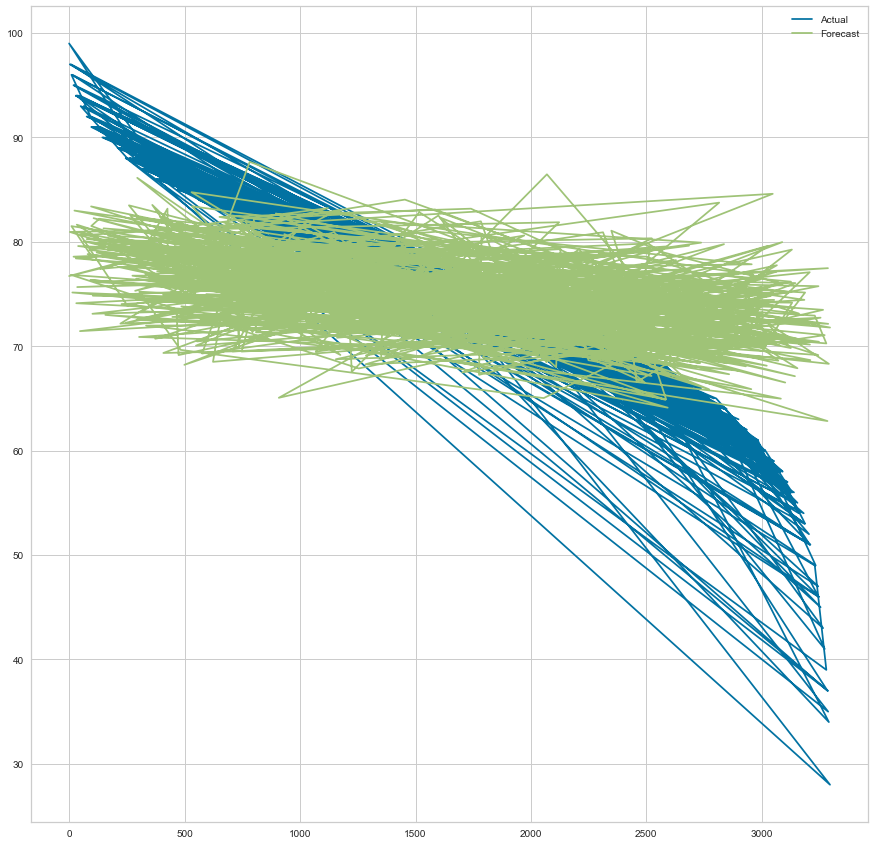

In [87]:
fig = plt.gcf()
plt.figure(figsize=(15,15))
plt.plot(br_pred_fin['metacritic'],label='Actual')
plt.plot(br_pred_fin['Predicted Metacritic Score'],label='Forecast')
plt.legend()

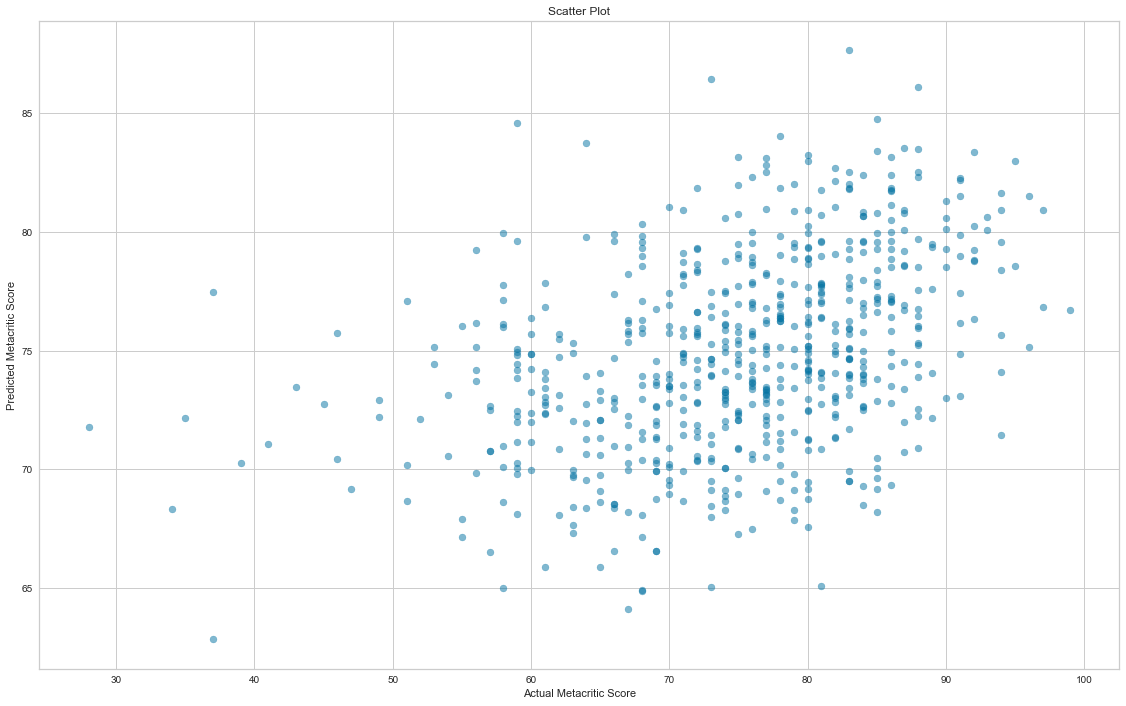

In [88]:
fig=plt.figure(figsize=(15,9))
ax=fig.add_axes([0,0,1,1])
ax.scatter(br_pred_fin['metacritic'], br_pred_fin['Predicted Metacritic Score'], alpha=0.5)
ax.set_xlabel('Actual Metacritic Score')
ax.set_ylabel('Predicted Metacritic Score')
ax.set_title('Scatter Plot')
plt.show()

# 14. Conclusion
From the line graphs, it seems that all 3 models tend to predict `metacritic` scores between 60 and 80. This range happens to be the average range of scores of video games. Thus all 3 models tend to under-estimate highly rated games and over-estimate poorly rated games.

Summary of results:

| Model                        | Test RMSE (with GridSearch)| Test RMSE (Base)   | Absolute Error   |
| ---------------------------- |:--------------------------:|:------------------:| -----------------|
| Random Forest Regressor      | 9.487118217587387          | 9.547566374653456  | 7.317760953625915|
| Support Vector Machine       | 9.857068901488233          | 9.516711070354274  | 7.132888084897704|
| PyCaret                      | -                          | 9.815711126761942  | 7.570090718963135|